In [67]:
import pandas as pd
import numpy as np
# from pymannkendall import original_test

# from kats.detectors.cusum import CUSUMDetector
# from kats.consts import TimeSeriesData

from scipy.stats import linregress
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['font.sans-serif'] = ['SimHei']  # 用黑体显示中文
plt.rcParams['axes.unicode_minus'] = False  # 解决负号显示问题

# # 示例数据：3个时间序列（列：'A', 'B', 'C'）
# dates = pd.date_range(start='2020-01-01', periods=100, freq='M')
# data = pd.DataFrame({
#     'A': np.random.randn(100).cumsum() + 5,  # 含趋势
#     'B': np.random.randn(100) + 10,          # 无趋势（白噪声）
#     'C': np.random.randn(100).cumsum() - 5   # 含趋势
# }, index=dates)

In [75]:
df=pd.read_csv('C:\\FILES_202305\\202504养鸡项目\\chickenfarming\\data\\data_cleaned\\all_dead_data.csv')
df=df[['ID_NUM','Date','Age','Dead','Weak','Lame_Paralysis','Mortality']]
df.fillna(0,inplace=True)
df['sick']=df['Weak']+df['Lame_Paralysis']
df=df[(df['Age']<=36) & (df['Age']>=0)]

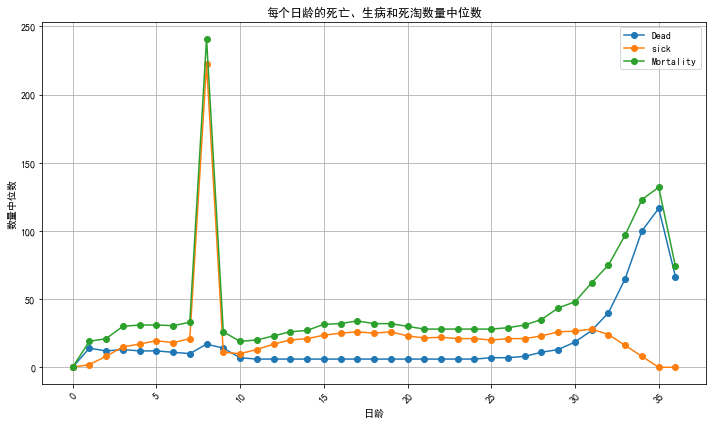

In [56]:
# 按日龄分组，计算死亡数量、生病数量和死淘数量的中位数
grouped = df.groupby('Age')
medians = grouped[['Dead', 'sick', 'Mortality']].median()

# 绘制图表
plt.figure(figsize=(10, 6))
for column in medians.columns:
    plt.plot(medians.index, medians[column], marker='o', label=column)

# 设置图表标题和标签
plt.title('每个日龄的死亡、生病和死淘数量中位数')
plt.xlabel('日龄')
plt.xticks(rotation=45)
plt.ylabel('数量中位数')
plt.legend()
plt.grid(True)

# 显示图表
plt.tight_layout()
plt.show()

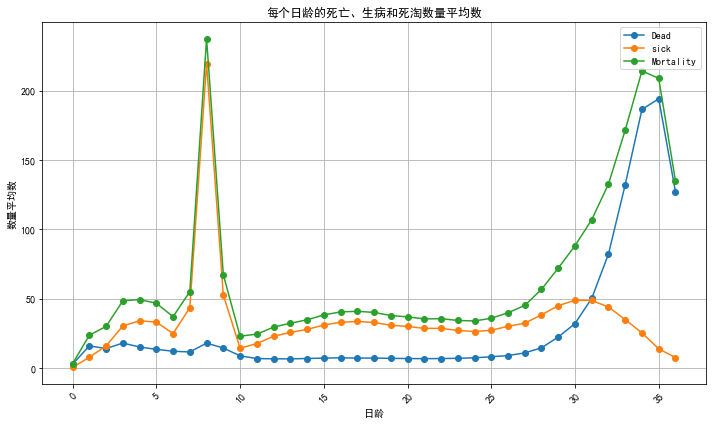

In [ ]:
# 按日龄分组，计算死亡数量、生病数量和死淘数量的平均数
grouped = df.groupby('Age')
means = grouped[['Dead', 'sick', 'Mortality']].mean()

# 绘制图表
plt.figure(figsize=(10, 6))
for column in means.columns:
    plt.plot(means.index, means[column], marker='o', label=column)

# 设置图表标题和标签
plt.title('每个日龄的死亡、生病和死淘数量平均数')
plt.xlabel('日龄')
plt.xticks(rotation=45)
plt.ylabel('数量平均数')
plt.legend()
plt.grid(True)

# 显示图表
plt.tight_layout()
plt.show()

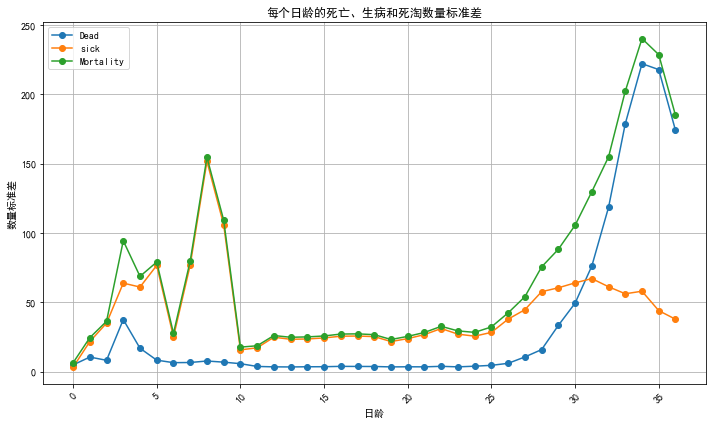

In [ ]:
# 按日龄分组，计算死亡数量、生病数量和死淘数量的标准数
grouped = df.groupby('Age')
stds = grouped[['Dead', 'sick', 'Mortality']].std()

# 绘制图表
plt.figure(figsize=(10, 6))
for column in stds.columns:
    plt.plot(stds.index, stds[column], marker='o', label=column)

# 设置图表标题和标签
plt.title('每个日龄的死亡、生病和死淘数量标准差')
plt.xlabel('日龄')
plt.xticks(rotation=45)
plt.ylabel('数量标准差')
plt.legend()
plt.grid(True)

# 显示图表
plt.tight_layout()
plt.show()

In [34]:
# 按日龄分组，并对死亡、生病、死淘数量进行聚合操作
grouped = df.groupby('Age')
stats = grouped.agg({
    'Dead': ['mean', 'median', 'std', lambda x: x.quantile(0.25), lambda x: x.quantile(0.75)],
    'Weak': ['mean', 'median', 'std', lambda x: x.quantile(0.25), lambda x: x.quantile(0.75)],
    'Mortality': ['mean', 'median', 'std', lambda x: x.quantile(0.25), lambda x: x.quantile(0.75)]
})

# 重新设置列名，使其更清晰
stats.columns = ['_'.join((col[0], col[1].__name__ if callable(col[1]) else col[1])) for col in stats.columns.values]
stats = stats.rename(columns=lambda x: x.replace('<lambda_0>', '25%_quantile').replace('<lambda_1>', '75%_quantile'))

stats.to_csv('./死淘数据按日龄统计.csv')

In [35]:
# 定义打标函数
def label_value(value, q25, q75):
    if value < q25:
        return 0
    elif value > q75:
        return 1
    return 2

# 合并统计数据和原始数据
merged_df = df.merge(stats, on='Age')

# 对死亡数量、生病数量、死淘数量进行打标
merged_df['Dead_label'] = merged_df.apply(
    lambda row: label_value(row['Dead'], row['Dead_25%_quantile'], row['Dead_75%_quantile']), axis=1)
merged_df['Weak_label'] = merged_df.apply(
    lambda row: label_value(row['Weak'], row['Weak_25%_quantile'], row['Weak_75%_quantile']), axis=1)
merged_df['Mortality_label'] = merged_df.apply(
    lambda row: label_value(row['Mortality'], row['Mortality_25%_quantile'], row['Mortality_75%_quantile']), axis=1)

# 提取需要的列
result_df = merged_df[['ID_NUM', 'Date', 'Age', 'Dead', 'Weak', 'Mortality',
                       'Dead_label', 'Weak_label', 'Mortality_label']]

In [52]:
result_df['dt_mon']=pd.to_datetime(result_df['Date']).dt.month
result_df['Farm']=result_df['ID_NUM'].str[:3]

c:\Users\sbjqlt\.conda\envs\python36\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
c:\Users\sbjqlt\.conda\envs\python36\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [60]:
df_id_num_good=pd.DataFrame(result_df[(result_df['Age']>=29) & (result_df['Dead_label']==0)]['ID_NUM'].value_counts())
df_id_num_good=df_id_num_good[df_id_num_good['ID_NUM']>=6]
df_id_num_good.to_csv('./df_id_num_good.csv')

df_id_num_bad=pd.DataFrame(result_df[(result_df['Age']>=29) & (result_df['Dead_label']==1)]['ID_NUM'].value_counts())
df_id_num_bad=df_id_num_bad[df_id_num_bad['ID_NUM']>=6]
df_id_num_bad.to_csv('./df_id_num_bad.csv')


In [62]:
df_dt_mon_good=pd.DataFrame(result_df[(result_df['Age']>=29) & (result_df['Dead_label']==0)]['dt_mon'].value_counts())
df_dt_mon_good=df_dt_mon_good[df_dt_mon_good['dt_mon']>=6]
df_dt_mon_good.to_csv('./df_dt_mon_good.csv')

df_dt_mon_bad=pd.DataFrame(result_df[(result_df['Age']>=29) & (result_df['Dead_label']==1)]['dt_mon'].value_counts())
df_dt_mon_bad=df_dt_mon_bad[df_dt_mon_bad['dt_mon']>=6]
df_dt_mon_bad.to_csv('./df_dt_mon_bad.csv')

In [64]:
df_dt_mon_bad

,dt_mon
1,482
2,404
3,375
12,132
11,9


In [63]:
df_dt_mon_good

,dt_mon
12,502
2,218
11,184
3,177
1,127


In [79]:
merged_df.groupby(['Month', 'Overall_label']).size().unstack(fill_value=0)

Overall_label,0,1,2
Month,,,
2024-10,13,244,40
2024-11,423,3922,174
2024-12,526,5954,342
2025-01,378,5307,539
2025-02,308,5311,658
2025-03,97,2047,357


In [99]:
# 将 Date 列转换为日期类型
df['Date'] = pd.to_datetime(df['Date'])

# 按日龄分组，并对死亡、生病、死淘数量进行聚合操作
grouped = df.groupby('Age')
stats = grouped.agg({
    'Dead': ['mean', 'median', 'std', lambda x: x.quantile(0.25), lambda x: x.quantile(0.75)],
    'sick': ['mean', 'median', 'std', lambda x: x.quantile(0.25), lambda x: x.quantile(0.75)],
    'Mortality': ['mean', 'median', 'std', lambda x: x.quantile(0.25), lambda x: x.quantile(0.75)]
})

# 重新设置列名，使其更清晰
stats.columns = ['_'.join((col[0], col[1].__name__ if callable(col[1]) else col[1])) for col in stats.columns.values]
stats = stats.rename(columns=lambda x: x.replace('<lambda_0>', '25%_quantile').replace('<lambda_1>', '75%_quantile'))

# 定义打标函数
def label_value(value, q25, q75):
    if value < q25:
        return 0
    elif value > q75:
        return 2
    return 1

# 合并统计数据和原始数据
merged_df = df.merge(stats, on='Age')

# 对死亡数量、生病数量、死淘数量进行打标
merged_df['Dead_label'] = merged_df.apply(
    lambda row: label_value(row['Dead'], row['Dead_25%_quantile'], row['Dead_75%_quantile']), axis=1)
merged_df['sick_label'] = merged_df.apply(
    lambda row: label_value(row['sick'], row['sick_25%_quantile'], row['sick_75%_quantile']), axis=1)
merged_df['Mortality_label'] = merged_df.apply(
    lambda row: label_value(row['Mortality'], row['Mortality_25%_quantile'], row['Mortality_75%_quantile']), axis=1)

# 找出每个 Date 的总体表现标签（只要有一个指标标记为 1 则整体标记为 1，只要有一个指标标记为 0 则整体标记为 0，否则为 2）
def get_overall_label(row):
    if 1 in [row['Dead_label'], row['sick_label'], row['Mortality_label']]:
        return 1
    elif 0 in [row['Dead_label'], row['sick_label'], row['Mortality_label']]:
        return 0
    return 2

merged_df['Overall_label'] = merged_df.apply(get_overall_label, axis=1)

# 提取月份信息
merged_df['Month'] = merged_df['Date'].dt.to_period('M')
merged_df['Farm'] = merged_df['ID_NUM'].str[:3]
merged_df['Chicken_batch'] = merged_df['ID_NUM'].str[4:6]



In [103]:
def get_heatmap(x_class,y_class,merged_df):
    # 按月份和总体表现标签统计数量
    monthly_stats = merged_df.groupby([x_class,y_class]).size().unstack(fill_value=0)

    # 调整列名以便于理解
    monthly_stats.columns = ['表现好', '表现中等', '表现差']
    monthly_stats=monthly_stats[['表现好', '表现差']]

    # 转置数据以符合所需的横轴和纵轴
    monthly_stats = monthly_stats.T

    # 创建宫格图（热力图）
    plt.figure(figsize=(10, 6))
    sns.heatmap(monthly_stats, annot=True, fmt='g', cmap='YlGnBu')

    # 设置图表标题和坐标轴标签
    if y_class=='Dead_label':
        title1='死亡情况热力图'
    elif y_class=='sick_label':
        title1='生病情况热力图'
    elif y_class=='Mortality_label':
        title1='死淘情况热力图'

    if x_class=='Farm':
        x_label='农场'
    elif x_class=='Chicken_batch':
        x_label='种鸡批次'
    elif x_class=='Month':
        x_label='月份'

    plt.title('按%s%s'%(x_label,title1))
    plt.xlabel(x_label)
    plt.ylabel('表现情况')

    # 显示图表
    plt.show()

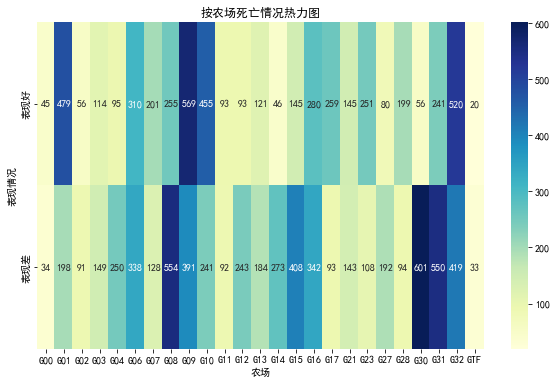

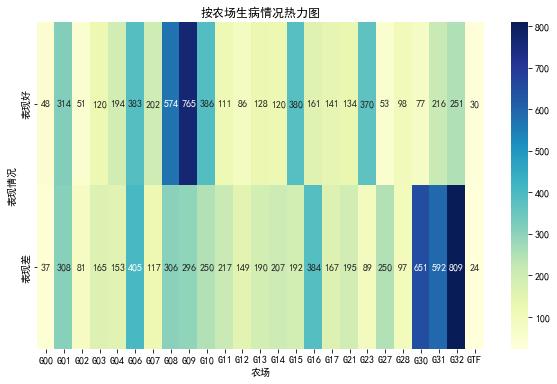

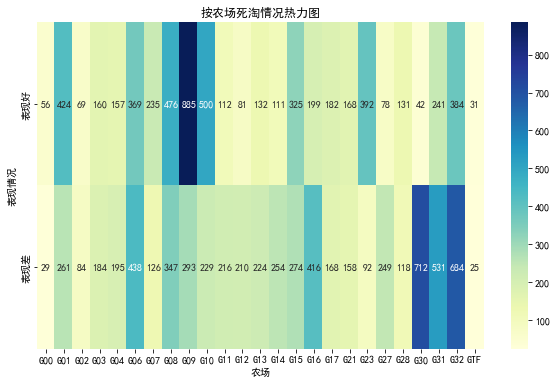

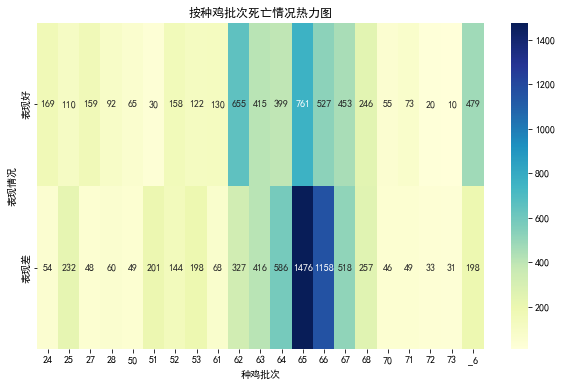

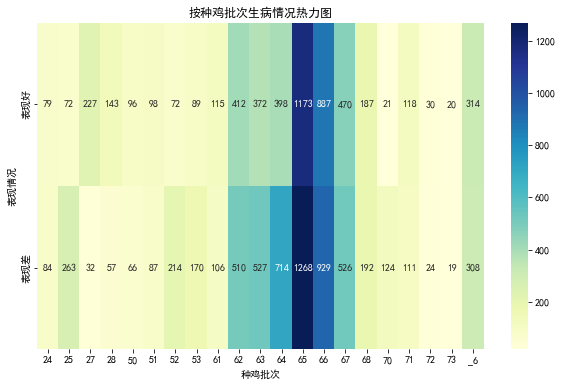

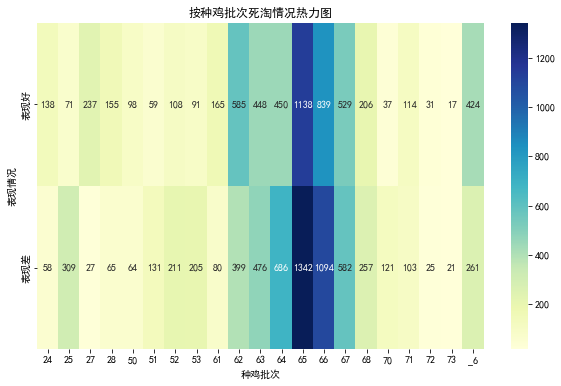

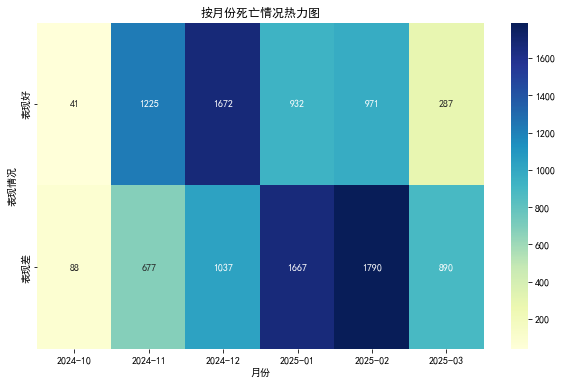

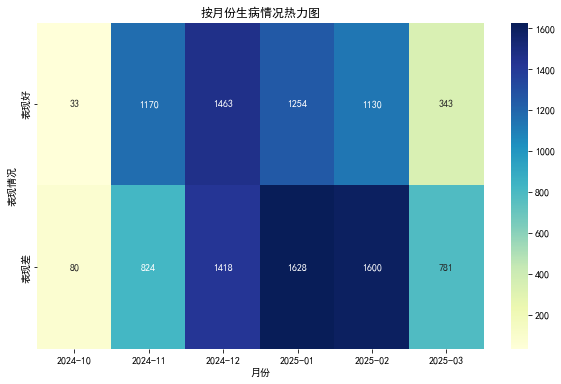

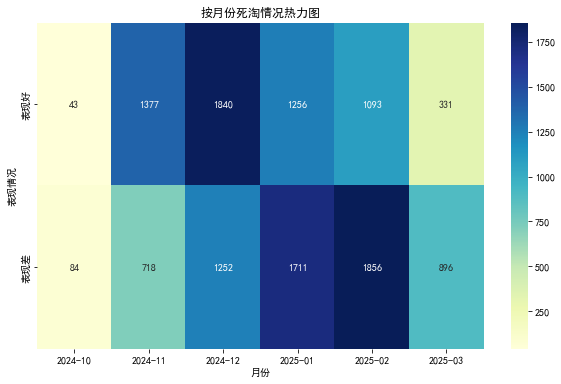

In [105]:
x_list=['Farm','Chicken_batch','Month']
y_list=['Dead_label','sick_label','Mortality_label']
x_class='Farm'
y_class='Dead_label'
for x_class in x_list:
    for y_class in y_list:
        get_heatmap(x_class,y_class,merged_df)

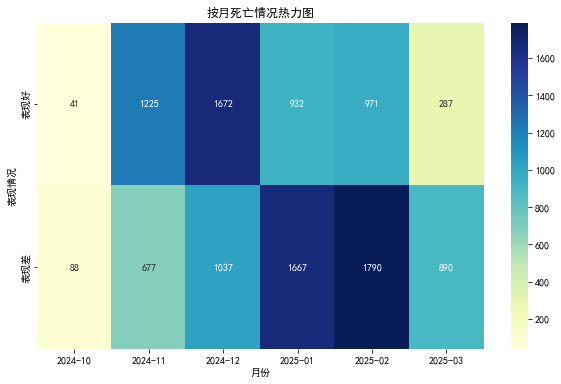

In [92]:
# 按月份和总体表现标签统计数量
monthly_stats = merged_df.groupby(['Month', 'Dead_label']).size().unstack(fill_value=0)

# 调整列名以便于理解
monthly_stats.columns = ['表现好', '表现中等', '表现差']
monthly_stats=monthly_stats[['表现好', '表现差']]

# 转置数据以符合所需的横轴和纵轴
monthly_stats = monthly_stats.T

# 创建宫格图（热力图）
plt.figure(figsize=(10, 6))
sns.heatmap(monthly_stats, annot=True, fmt='g', cmap='YlGnBu')

# 设置图表标题和坐标轴标签
plt.title('按月死亡情况热力图')
plt.xlabel('月份')
plt.ylabel('表现情况')

# 显示图表
plt.show()

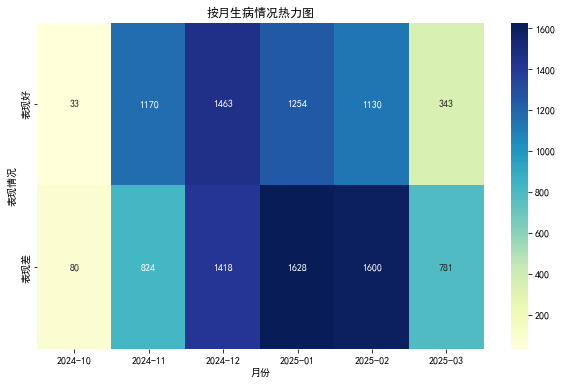

In [94]:
# 按月份和总体表现标签统计数量
monthly_stats = merged_df.groupby(['Month', 'sick_label']).size().unstack(fill_value=0)

# 调整列名以便于理解
monthly_stats.columns = ['表现好', '表现中等', '表现差']
monthly_stats=monthly_stats[['表现好', '表现差']]

# 转置数据以符合所需的横轴和纵轴
monthly_stats = monthly_stats.T

# 创建宫格图（热力图）
plt.figure(figsize=(10, 6))
sns.heatmap(monthly_stats, annot=True, fmt='g', cmap='YlGnBu')

# 设置图表标题和坐标轴标签
plt.title('按月生病情况热力图')
plt.xlabel('月份')
plt.ylabel('表现情况')

# 显示图表
plt.show()

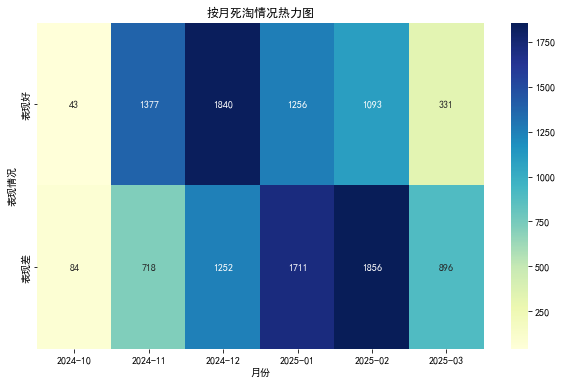

In [95]:
# 按月份和总体表现标签统计数量
monthly_stats = merged_df.groupby(['Month', 'Mortality_label']).size().unstack(fill_value=0)

# 调整列名以便于理解
monthly_stats.columns = ['表现好', '表现中等', '表现差']
monthly_stats=monthly_stats[['表现好', '表现差']]

# 转置数据以符合所需的横轴和纵轴
monthly_stats = monthly_stats.T

# 创建宫格图（热力图）
plt.figure(figsize=(10, 6))
sns.heatmap(monthly_stats, annot=True, fmt='g', cmap='YlGnBu')

# 设置图表标题和坐标轴标签
plt.title('按月死淘情况热力图')
plt.xlabel('月份')
plt.ylabel('表现情况')

# 显示图表
plt.show()

In [48]:
# 按鸡舍编号分组
grouped = df.groupby('ID_NUM')

# 存储每个鸡舍是否有倒U型趋势的结果
results = {}

# 对每个鸡舍的时间序列进行检验
for house_id, group in grouped:
    ages = group['Age'].values
    dead_numbers = group['Weak'].values

    # 进行二次多项式拟合
    coefficients = np.polyfit(ages, dead_numbers, 2)
    a, b, c = coefficients

    # 判断是否为倒U型趋势（a < 0）
    is_inverted_u = a < 0

    # 同时，为了更准确，可以进一步检查拟合优度（这里简单使用线性回归的 r 平方值来近似）
    _, _, r_value, _, _ = linregress(ages, dead_numbers)
    r_squared = r_value ** 2

    # 可以设置一个 r 平方值的阈值，例如 0.5，来过滤掉拟合效果不好的情况
    if r_squared > 0.1:
        results[house_id] = is_inverted_u
    else:
        results[house_id] = False

In [49]:
[k for k, v in results.items() if v ] 

['G00_71_H2',
 'G00_73_H2',
 'G01A_63_H1',
 'G01A_63_H2',
 'G03_66_H2',
 'G06_65_H14',
 'G06_66_H7',
 'G08_65_H18',
 'G09_65_H2',
 'G09_66_H13',
 'G09_66_H15',
 'G09_66_H16',
 'G09_66_H20',
 'G09_67_H20',
 'G10_63_H17',
 'G10_63_H18',
 'G10_63_H2',
 'G10_63_H21',
 'G11_70_H1',
 'G11_70_H3',
 'G11_70_H4',
 'G11_70_H7',
 'G12_67_H3',
 'G12_68_H6',
 'G13_67_H3',
 'G13_67_H9',
 'G14_65_H5',
 'G15_65_H1',
 'G17_67_H6',
 'G17_68_H1',
 'G17_68_H12',
 'G17_68_H3',
 'G17_68_H9',
 'G21_61_H4',
 'G30_65_H12',
 'G30_66_H10',
 'G30_66_H5',
 'G30_66_H8',
 'G31_64_H24',
 'G32_62_H11',
 'G32_63_H16',
 'G32_63_H17',
 'G32_63_H19',
 'G32_64_H11',
 'G32_64_H12',
 'G32_64_H17',
 'G32_64_H9']